## Building Regression Models with the UCI Automobile Dataset

For this week, we'll be working on building simple regression models on the automobile dataset.

### Step 0: Defining the Question

We have seen some evidence for a linear relationship between engine-size and price, and horsepower and price. With this, we can hypothesize that we can fit a linear model to predict the data with non-zero weight.

### Step 1: Environment Setup

In [1]:
# Run this cell to install the required packages:
# You might have to replace '!' with '%', depending on your environment.
# You might also need to restart your kernel after installation.
!pip install numpy pandas matplotlib scikit-learn --quiet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Step 2: Read and Clean Data

In [ ]:
# load the dataset from csv file
df = pd.read_csv('../data/imports-85.csv')
# pd.read_csv('./data/imports-85.csv')
# pd.read_csv('imports-85.csv')

In [3]:
# Display the columns of the data
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
# Drop all rows with missing values
df = df.dropna() # cleaning step!! :D

### Step 2: Linear Regression

First we'll do a linear regression on engine size vs. price

In [5]:
# First let's extract the features we want to use for our regression model.
X = df[['engine-size']].values # .values turns into a numpy array

In [6]:
# Now let's build our target variable and call it y
y = df[['price']].values

In [7]:
# Now split the data into training and testing sets with a test size of 20%. Use a random state of 42 for reproducibility.
# This can be done using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Create a linear regression model using scikit-learn's LinearRegression class
mdl = LinearRegression()

In [9]:
# Now to fit the model to our training data using the fit method
mdl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Now we can make predictions on our test data using the predict method
y_pred = mdl.predict(X_test)

In [14]:
# Let's evaluate the model. Use mean_squared_error and r2_score from sklearn.metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MSE: {mse:2e}")
print(f"R_sq: {r2}")

MSE: 1.165610e+07
R_sq: 0.4466635043599163


In [16]:
# Get the coefficients of the model using the coef_ attribute
slope = mdl.coef_[0]
print(f"Coefficient: {mdl.coef_[0]}")
# Get the intercept of the model using the intercept_ attribute
intercept = mdl.intercept_
print(f"Intercept: {mdl.intercept_}")

Coefficient: [168.51032146]
Intercept: [-8601.30329156]


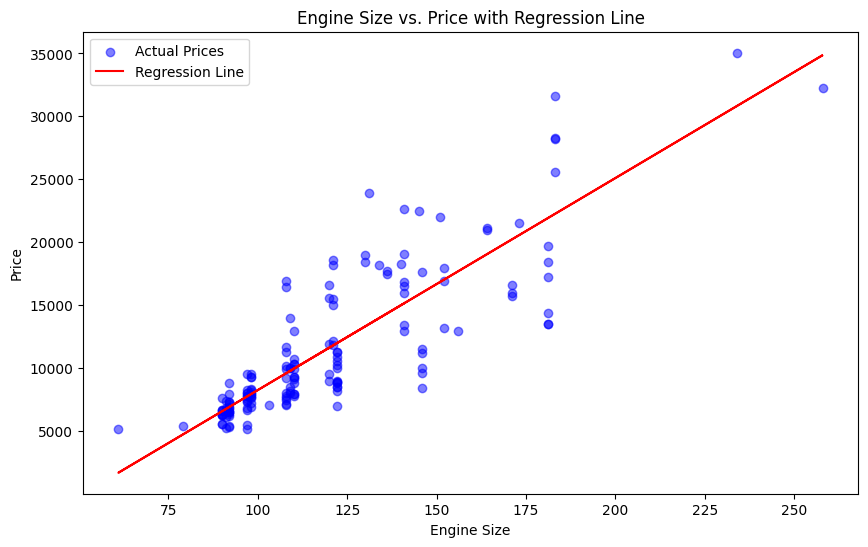

In [17]:
# Now plot a line using the slope and intercept, and the original data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Prices')
plt.plot(X, slope * X + intercept, color='red', label='Regression Line')
plt.title('Engine Size vs. Price with Regression Line')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

### Step 3: Multivariate Linear Regression

Let's see if we can improve prediction accuracy with multiple features.

In [18]:
# Let's now try a multivariate linear regression with both engine-size and horsepower
# Define X and y below
X = df[['engine-size','horsepower']]
y = df[['price']]

In [20]:
X.shape

(159, 2)

In [19]:
# Now split the data into training and testing sets with a test size of 20% (same as above).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create another model
mdl = LinearRegression()

In [21]:
# Train the multivariate model
mdl.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Now let's evaluate the multivariate model
y_pred = mdl.predict(X_test)

In [23]:
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print(f"MSE: {mse:2e}")
print(f"r2: {r2}")

MSE: 9.610511e+06
r2: 0.3761440682190619


In [24]:
# We can see which features are more important by looking at the coefficients again
# Print the coefficients of the multivariate model below
mdl.coef_

array([[153.42721494,  17.42014166]])

#### Does our model perform better with multiple features? What about even more features?

#### On your own: try the above multivariate but with more features.

In [26]:
# Add even more features to see if our model performs better
features = ['engine-size','height','length','highway-mpg']
X = df[features]

You may find that accuracy does not always increase with more features. Sometimes it decreases!

### Step 4: Nonlinear Regression

#### On your own: First build a linear model that predicts highway-mpg from engine-size.

In [82]:
# Build model below and print the evaluation metrics.


#### Then transform your engine-size feature to be 1/engine-size, and use that as a feature. 

In [ ]:
# Now let's try a nonlinear regression model for highway MPG using 1/X as the feature
X = 1/X

#### Which works better, the original feature or transformed one?

### Step 4: Polynomial Regression

In [ ]:
# Now try polynomial regression for highway MPG using PolynomialFeatures degree=2
poly = PolynomialFeatures(degree=2)  # You can change the degree for more complexity
X_poly = poly.fit_transform(df[['engine-size']].values)
y = df['highway-mpg'].values
# Perform regression with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
# Now we can make predictions on our test data for polynomial highway MPG
X_poly_test = poly.transform(X_test.reshape(-1, 1))  # Transform test
y_pred_poly = model_poly.predict(X_poly_test)
# Let's evaluate the polynomial highway MPG model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Mean Squared Error (Polynomial Highway MPG): {mse_poly:.2e}')
print(f'R^2 Score (Polynomial Highway MPG): {r2_poly:.2f}')

In [85]:
# Get R^2 values for polynomial degrees [1, 2, 5, 10, 20, 30]


#### What do you notice about the regression evaluation metrics?